In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import json

load data and analyze differences between runs

In [2]:
latenciesTypes=['latenciesInserts1Old','latenciesInserts1New', \
                'latenciesInserts2Old','latenciesInserts2New']


In [3]:
def loadLatencies(resultPath):
    latenciesDict={}
    for latenciesType in latenciesTypes:
        all_files = glob.glob(os.path.join(resultPath, "*",latenciesType + ".csv"))     # advisable to use os.path.join as this makes concatenation OS independent
        
        df_from_each_file = [pd.read_csv(f, delim_whitespace=True, index_col=0, names=[int(f.split('/')[-2])]) for f in all_files]
        df_from_each_file = df_from_each_file[::-1]
        df = pd.concat(df_from_each_file, axis=1,copy=True)

        df = df.sort_index(axis=1)
        latenciesDict[latenciesType]=df
    latenciesDict = mergeLatenciesInserts(latenciesDict)
        
    return latenciesDict


def mergeLatenciesInserts(latenciesDict):
    df1=latenciesDict.pop('latenciesInserts1Old')
    df2=latenciesDict.pop('latenciesInserts2Old')
    num_to_drop_head = int(np.floor(df1.shape[0] * 0.05))
    num_to_drop_tail = int(np.floor(df1.shape[0] * 0.20))
    df1=df1.drop(df1.tail(num_to_drop_tail).index) 
    df2=df2.drop(df2.head(num_to_drop_head).index) 
    latenciesDict['latenciesInsertsOld'] = pd.concat([df1,df2], axis=0,copy=True)
    
    df1=latenciesDict.pop('latenciesInserts1New')
    df2=latenciesDict.pop('latenciesInserts2New')
    df1=df1.drop(df1.tail(num_to_drop_tail).index) 
    df2=df2.drop(df2.head(num_to_drop_head).index) 
    latenciesDict['latenciesInsertsNew'] = pd.concat([df1,df2], axis=0,copy=True)
    
    return latenciesDict


In [4]:
relativeLatency = lambda med1, med2 : ((med1/med2)-1)*100

In [5]:
def plotRelativeLatencies(latencies):
    med1=latencies['latenciesInsertsOld'].median(axis=0)
    med2=latencies['latenciesInsertsNew'].median(axis=0)

    med3=latencies['latenciesQueries1Old'].median(axis=0)
    med4=latencies['latenciesQueries1New'].median(axis=0)

    med5=latencies['latenciesQueries2Old'].median(axis=0)
    med6=latencies['latenciesQueries2New'].median(axis=0)
    
    

    fig, axs = plt.subplots(1, 3, figsize = (15,4), sharey=True)
    plt.suptitle('Relative differences between A1 and A2')
    
    axs[0].plot(relativeLatency(med1,med2), marker='o')
    axs[0].set_title('Inserts, latencies')
    
    axs[1].plot(relativeLatency(med3,med4),marker='o')
    axs[1].set_title('First set of queries')
    
    
    axs[2].plot(relativeLatency(med5,med6),marker='o')
    axs[2].set_title('Second set of queries')
    
    for ax in axs:
        ax.axhline(0, color='black',linestyle="--")
        ax.yaxis.set_tick_params(labelbottom=True)
        ax.set_xlabel('commit, number')
        ax.set_ylabel('relative latency, %')

In [6]:
def plotDistribution(df1, df2):
    # drop first 15% and last 30%
    num_to_drop_head = int(np.floor(df1.shape[0] * 0.15))
    num_to_drop_tail = int(np.floor(df1.shape[0] * 0.3))
    df1=df1.drop(df1.tail(num_to_drop_tail).index) 
    df1=df1.drop(df1.head(num_to_drop_head).index) 

    
    
    num_to_drop_head = int(np.floor(df2.shape[0] * 0.15))
    num_to_drop_tail = int(np.floor(df2.shape[0] * 0.3))
    df2=df2.drop(df2.tail(num_to_drop_tail).index)
    df2=df2.drop(df2.head(num_to_drop_head).index) 

     
    
    
    fig, axs = plt.subplots(10, 2, figsize = (15, 30), sharey=True)
    plt.suptitle('Relative differences between A1 and A2')
    for counter, column in enumerate(df1.columns):
        # filter outlier with 90%-quantile
        q1 = np.min(df1[column])
        q3_old = np.percentile(df1[column],90)
        q3_new = np.percentile(df2[column],90)
        q3 = np.max([q3_old, q3_new])
        
        axs[counter, 0].hist(df1[column],range=(q1, q3), density=True, bins=50)
        axs[counter, 0].set_title('commit number ' + str(column))
        
        
        axs[counter, 1].hist(df2[column], range=(q1, q3), density=True, bins=50)
        axs[counter, 1].set_title('commit number ' + str(column))


## Test Run for 5 random commits

Mean differencies:
1.29721547035345 %
5.163074864147292 %
3.0884895168810322 %


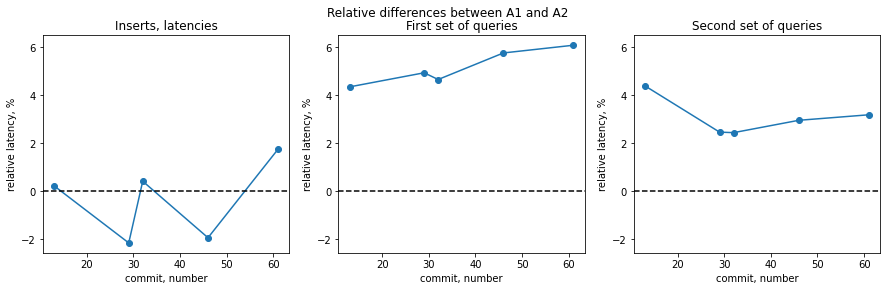

In [7]:
latencies=loadLatencies("results/runtest1")
plotRelativeLatencies(latencies)

Mean differencies:
0.5945662940237995 %
5.345413910895012 %
2.7087349044964437 %


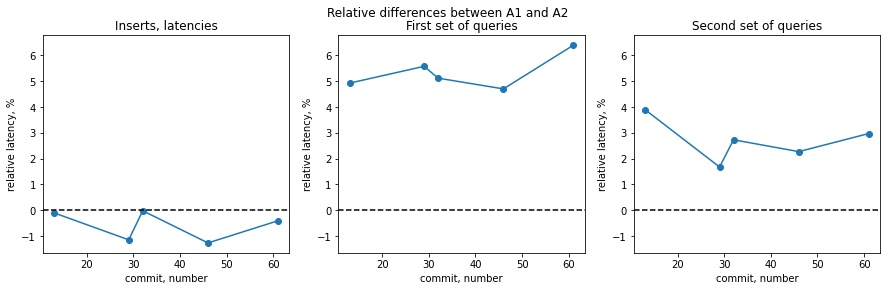

In [8]:
latencies=loadLatencies("results/runtest2")
plotRelativeLatencies(latencies)

## Main Run 1

Mean differencies:
1.48558833695531 %
4.745242322040482 %
2.69213895554887 %


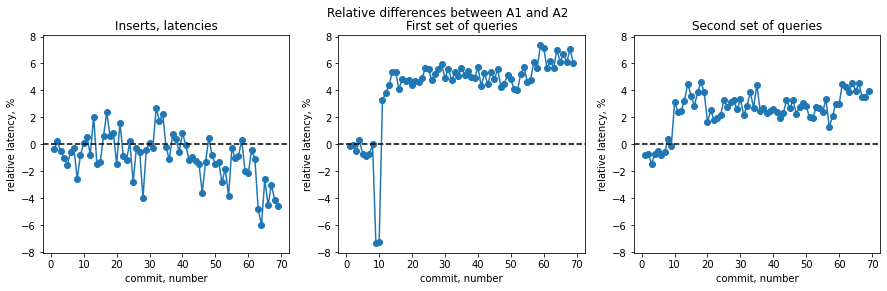

In [9]:
latencies=loadLatencies("results/run1")
plotRelativeLatencies(latencies)

Mean differencies:
1.43693815828581 %
4.544158203396287 %
2.6237446433781897 %


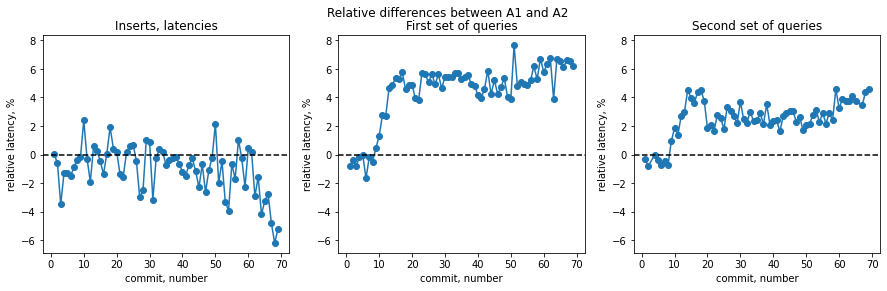

In [10]:
latencies=loadLatencies("results/run2")
plotRelativeLatencies(latencies)

Mean differencies:
1.578410277598299 %
4.763675496331451 %
2.565122566922074 %


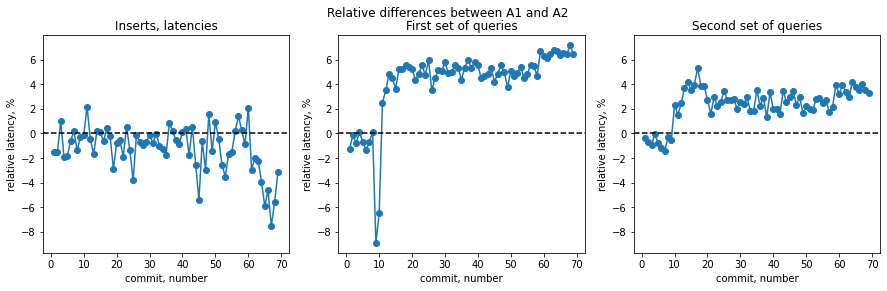

In [11]:
latencies=loadLatencies("results/run3")
plotRelativeLatencies(latencies)